In [60]:
import triangle as tr
import numpy as np
import matplotlib.pyplot as pl
import json
import igl

In [67]:
box_is_obstacle = False
sh = 1
sb = 0.1
n_spikes = 10

bh = 0.2
bb = 0.2
bho = -0.05
bbo = -0.1
a = 0.0008
# a = 100000

v = np.array([[-sb/2, 0], [sb/2, 0], [0, sh]])
f = np.array([[0, 1, 2]])

t = tr.triangulate({"vertices": v}, f"Qqa{a}")
f = t["triangles"]
v = t["vertices"]

trans = np.array([[2*t*sb, 0] for t in range(n_spikes)])

box_v = np.array([[-bb+bbo, sh+bho], [bbo, sh+bho], [bbo, sh+bho+bh], [-bb+bbo, sh+bho+bh]])

t = tr.triangulate({"vertices": box_v}, f"Qqa{a}")
box_f = t["triangles"]
box_v = t["vertices"]

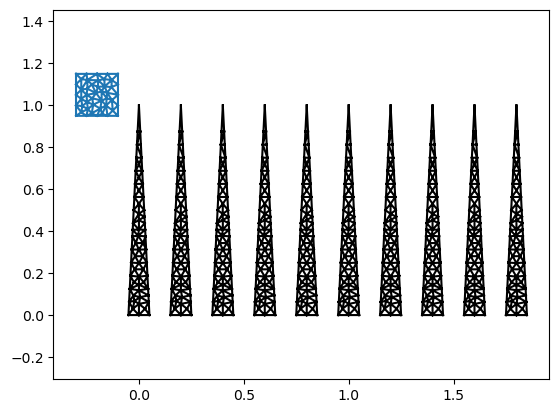

In [68]:
for t in trans:
    pl.triplot(v[:, 0]+t[0], v[:, 1]+t[1], f, '-k')
pl.triplot(box_v[:, 0], box_v[:, 1], box_f)
pl.axis('equal')
pl.show()

In [70]:
sim = {
    "common": "common.json",
    "geometry": []
}

for t in trans:
    sim["geometry"].append({
        "mesh": "spike.obj",
        "transformation": {
            "translation": [np.round(t[0]*1000)/1000, np.round(t[1]*1000)/1000]
        },
        "volume_selection": 1,
        "surface_selection": {
            "id": 1,
            "axis": -2,
            "position": 0.01
        }
    })

if box_is_obstacle:
    sim["geometry"].append({
        "mesh": "box.obj",
        "surface_selection": 2,
        "is_obstacle": True
    })
else:
    sim["geometry"].append({
        "mesh": "box.obj",
        "volume_selection": 2,
        "surface_selection": {
            "id": 2,
            "axis": 2,
            "position": sh+bho+bh-0.01
        }
    })

with open("sim.json", "w") as file:
    json.dump(sim, file)

tmp = np.column_stack((v[:, 0], v[:, 1], np.zeros_like(v[:, 0])))
igl.write_triangle_mesh("spike.obj", tmp, f)

tmp = np.column_stack((box_v[:, 0], box_v[:, 1], np.zeros_like(box_v[:, 0])))
igl.write_triangle_mesh("box.obj", tmp, box_f)

True